In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
meter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/new_impute_linear.csv',
                    index_col='Time', parse_dates=True).iloc[192:, :]
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_weather.csv',
                      index_col='Time', parse_dates=True).drop('Unnamed: 0', axis=1).iloc[192:, :]

In [ ]:
meter.isna().sum()

female_1         0
female_2         0
female_3         0
female_4         0
female_6         0
female_8         0
male_3           0
male_4           0
male_5           0
bundit           0
csb2_pailom      0
dean_edu         0
food_indus       0
itsc_front       0
language         0
mechanical_2     0
old_art          0
rh_cmu           0
serve_techsci    0
test_animal      0
dtype: int64

In [ ]:
weather.isna().sum()

pm10     0
pm2.5    0
temp     0
humid    0
dtype: int64

In [ ]:
meter.describe().round(2)

,female_1,female_2,female_3,female_4,female_6,female_8,male_3,male_4,male_5,bundit,csb2_pailom,dean_edu,food_indus,itsc_front,language,mechanical_2,old_art,rh_cmu,serve_techsci,test_animal
count,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00,53761.00
mean,4.11,3.64,3.06,3.87,3.61,4.93,4.42,4.47,4.65,10.00,31.34,7.66,29.48,25.84,5.62,2.44,6.88,7.98,1.37,32.90
std,2.22,1.77,1.82,2.06,2.30,2.70,2.57,2.49,2.09,8.26,18.95,7.94,14.83,6.55,5.14,1.80,6.01,4.78,1.23,11.05
min,0.00,0.32,0.26,0.00,0.00,0.00,0.00,0.00,0.51,1.54,0.51,0.00,0.00,9.47,0.19,0.16,0.32,2.05,0.00,0.00
25%,2.35,2.11,1.66,1.86,1.59,2.89,2.12,2.24,2.91,4.48,16.64,2.07,20.23,21.50,2.12,1.12,2.63,4.61,0.67,25.12
50%,4.10,3.46,2.94,4.16,3.52,5.06,4.67,4.74,4.74,6.27,23.75,3.46,24.32,23.04,2.69,1.82,4.48,5.57,0.82,31.59
75%,5.70,4.99,4.19,5.38,5.15,6.92,6.40,6.34,6.37,12.54,40.56,11.64,35.20,28.92,7.62,3.09,9.08,10.82,1.60,39.81
max,11.33,9.47,10.11,9.79,12.48,12.86,14.08,11.52,11.00,48.51,98.30,45.76,96.51,58.62,37.76,12.45,38.53,29.63,8.38,79.10


In [ ]:
weather.describe().round(2)

,pm10,pm2.5,temp,humid
count,53761.00,53761.00,53761.00,53761.00
mean,28.37,24.71,30.80,50.73
std,41.21,37.19,2.61,12.93
min,1.00,1.00,15.00,11.00
25%,4.00,4.00,29.00,42.00
50%,12.00,10.00,31.00,53.00
75%,38.00,33.00,32.00,61.00
max,737.00,701.00,39.00,78.00


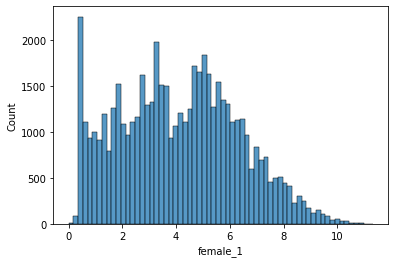

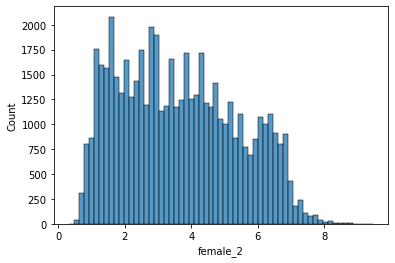

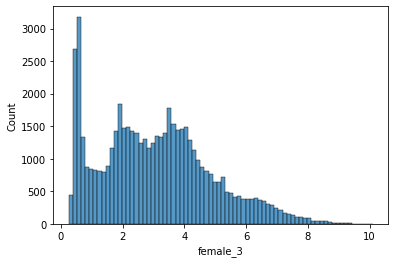

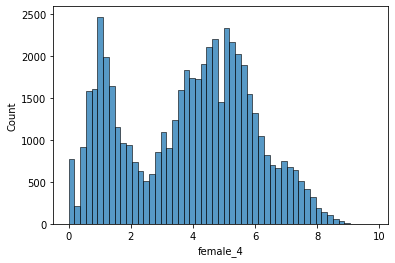

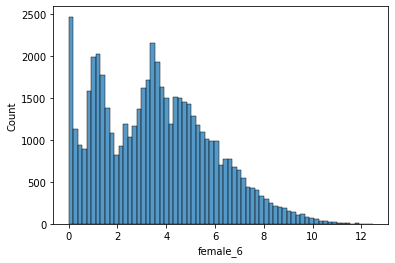

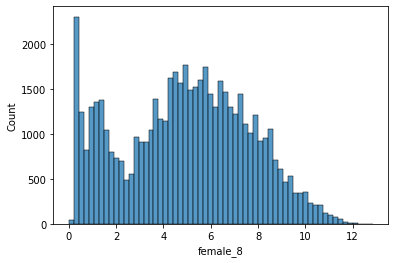

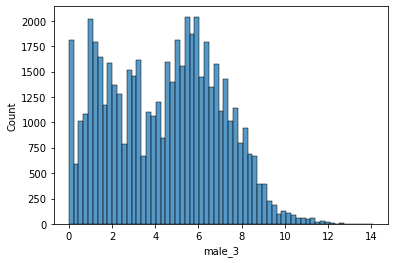

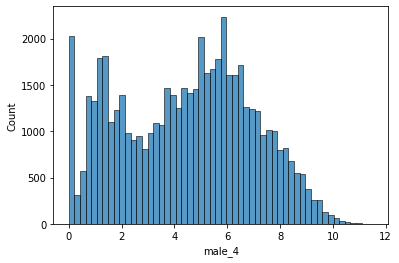

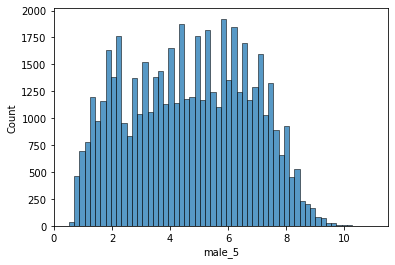

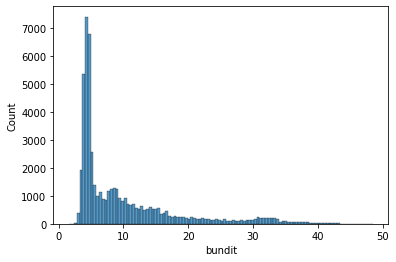

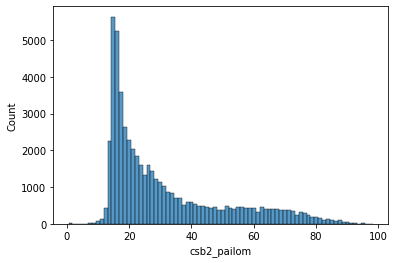

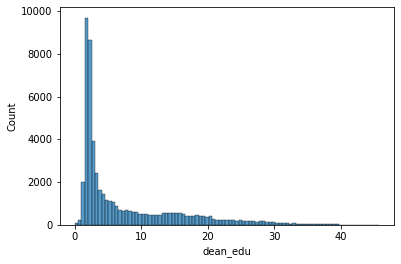

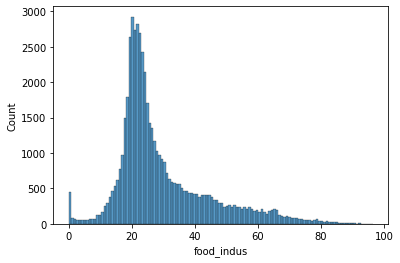

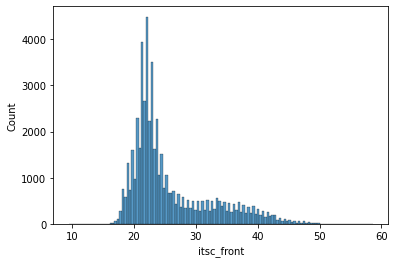

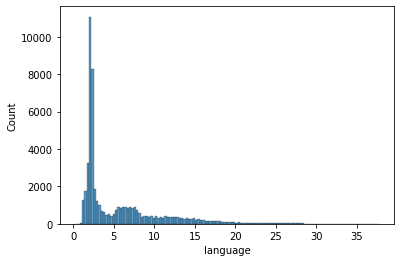

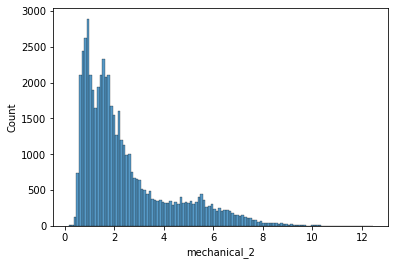

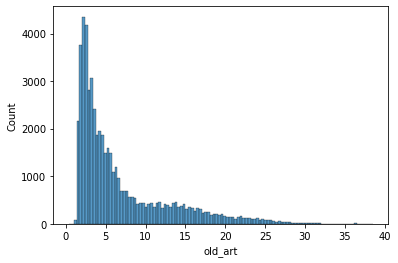

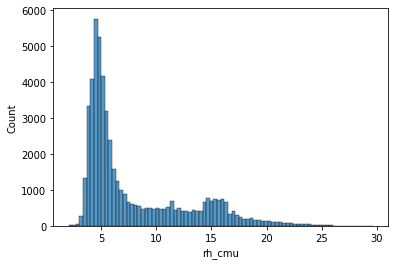

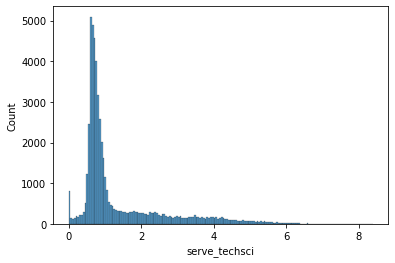

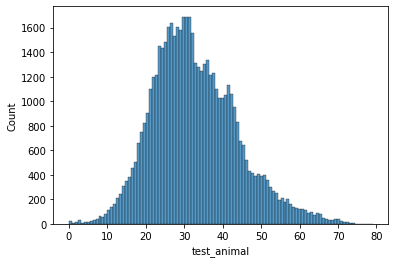

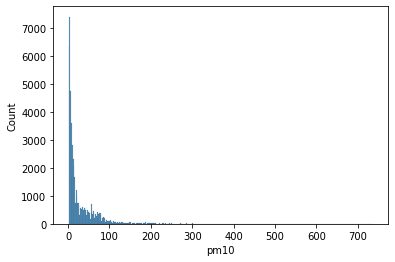

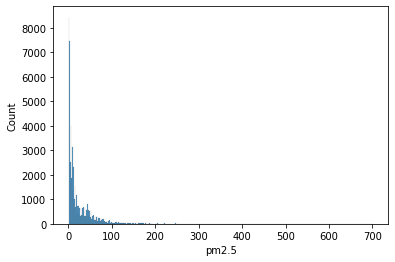

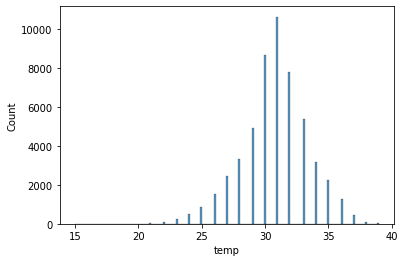

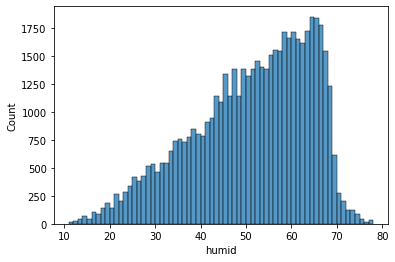

In [ ]:
# Checking normal distribution for Standard Scaler
for col in meter.columns:
  sns.histplot(data=meter, x=col)
  plt.show()
for col in weather.columns:
  sns.histplot(data=weather, x=col)
  plt.show()


# 20 Forecasting models for 20 Buildings

# Feature Engineering
1. Change datetime to int
2. Extract Year, Month, Day, Hour, Minute, Day name, Holiday, ....  ,etc.
3. Encoding cyclical continuous features - 24-hour time

You want to preserve the cyclical nature of your inputs. One approach is to cut the datetime variable into four variables: year, month, day, and hour. Then, decompose each of these (except for year) variables in two.

You create a sine and a cosine facet of each of these three variables (i.e., month, day, hour), which will retain the fact that hour 24 is closer to hour 0 than to hour 21, and that month 12 is closer to month 1 than to month 10.

A quick Google search got me a few links on how to do it:

https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

https://stats.stackexchange.com/questions/126230/optimal-construction-of-day-feature-in-neural-networks

https://datascience.stackexchange.com/questions/5990/what-is-a-good-way-to-transform-cyclic-ordinal-attributes

https://medium.com/towards-data-science/top-6-errors-novice-machine-learning-engineers-make-e82273d394db

In [ ]:
import matplotlib.dates as mdates

In [ ]:
X = weather.reset_index().copy() #shape(53761, 5) ==> dates, pm2.5, pm10, temp, humid
X['Time'] = X['Time'].map(mdates.date2num)
X = X.values
y = meter['female_1'].values # shape(53761,) ==> engergy consumption

# Support Vector Machine

- TimeSeriesSplit
- Try ==> StandardScaler VS Min-Max

In [ ]:
tscv = TimeSeriesSplit(n_splits = 4)
rmse = []
for train_index, test_index in tscv.split(X): 
  # Split train test
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Scaling
  scaler_X = StandardScaler()
  scaler_X.fit(X_train)
  X_train_scaled = scaler_X.transform(X_train)
  
  # Traing model
  svr_rbf = SVR(kernel='rbf')
  svr_rbf.fit(X_train_scaled, y_train)
  
  # Predict
  X_test_scaled = scaler_X.transform(X_test)
  y_hat = svr_rbf.predict(X_test_scaled)
  rmse.append(mean_squared_error(y_test, y_hat))
    
print("RMSE: {}".format(np.mean(rmse)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

RMSE: 9.923104117140447


In [ ]:
rmse

[9.141213816926165, 12.036938141887331, 9.973692358361166, 8.540572151387128]

In [ ]:
def SVR_model(col):
  X = weather.reset_index().copy()   #shape(53761, 5) ==> dates, pm2.5, pm10, temp, humid
  X['Time'] = X['Time'].map(mdates.date2num)
  X = X.values
  y = meter[col].values              # shape(53761,) ==> engergy consumption

  tscv = TimeSeriesSplit(n_splits = 4)
  rmse = []
  for train_index, test_index in tscv.split(X): 
    # Split train test
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Scaling
    scaler_X = StandardScaler()
    scaler_X.fit(X_train)
    X_train_scaled = scaler_X.transform(X_train)
    
    # Traing model
    svr_rbf = SVR(kernel='rbf')
    svr_rbf.fit(X_train_scaled, y_train)
    
    # Predict
    X_test_scaled = scaler_X.transform(X_test)
    y_hat = svr_rbf.predict(X_test_scaled)
    rmse.append(mean_squared_error(y_test, y_hat))
      
  return rmse

In [ ]:
building_name = meter.columns
building_name

Index(['female_1', 'female_2', 'female_3', 'female_4', 'female_6', 'female_8',
       'male_3', 'male_4', 'male_5', 'bundit', 'csb2_pailom', 'dean_edu',
       'food_indus', 'itsc_front', 'language', 'mechanical_2', 'old_art',
       'rh_cmu', 'serve_techsci', 'test_animal'],
      dtype='object')

In [ ]:
allBuildings_rsme = []
for name in building_name:
  allBuildings_rsme.append(SVR_model(name))

In [ ]:
pd.DataFrame(allBuildings_rsme)

,0,1,2,3
0,9.141214,12.036938,9.973692,8.540572
1,5.762746,20.338139,7.508907,4.649529
2,4.945296,8.336234,5.363449,3.369300
3,10.295200,14.948780,11.855589,15.585495
4,10.351244,8.109961,5.211134,22.824822
5,10.214808,30.211496,8.686478,34.641566
6,6.704327,9.897914,10.816241,48.326089
7,10.678494,5.554362,6.360394,52.767027
8,14.540484,17.528859,7.290882,5.136460
9,90.827973,65.028877,45.641101,148.389356


# KShape

In [ ]:
# 8 months ==> 9th Feb to 9th Dec 2020
meter = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/new_impute_linear.csv',
                    index_col='Time', parse_dates=True).iloc[192:23520, :]
weather = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IS project/3_imputed_dataset/impute_weather.csv',
                      index_col='Time', parse_dates=True).drop('Unnamed: 0', axis=1).iloc[192:23520, :]

In [ ]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

ks_2 = KShape().from_json('/content/drive/MyDrive/Colab Notebooks/IS project/model/ks_305D.json')
ks_3 = KShape().from_json('/content/drive/MyDrive/Colab Notebooks/IS project/model/ks3_305D.json')
ks_4 = KShape().from_json('/content/drive/MyDrive/Colab Notebooks/IS project/model/ks4_305D.json')
ks_5 = KShape().from_json('/content/drive/MyDrive/Colab Notebooks/IS project/model/ks5_305D.json')

In [ ]:
df_reshape = building20.T.values.reshape(len(building20.columns), -1, 1)
X = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(df_reshape)